In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='./Marianne-Regular.otf')

In [22]:
df = pd.read_csv('departement2021.csv',dtype=str)
deps = gpd.read_file('deptot.geojson')
points = gpd.read_file('pref.geojson')

In [27]:
databrut = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/4f39ec91-80d7-4602-befb-4b522804c0af',dtype=str,sep=";")
data = databrut.rename(columns={'dep':'code','n_cum_dose1':'data'})
data.data = data.data.astype(float)

In [28]:
data = data[data['jour'] == data.jour.max()]


In [30]:
%matplotlib inline

In [39]:
def generateImg(titre, unite, dossier,format_type):
    if(unite != ''):
        unite = ' '+unite
    print('Regions')
    for r in df.REG.unique():
        print(r)
        naq = df[df['REG'] == r].DEP.unique()
        states = pd.merge(deps,data,on='code',how='left')
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        plt.rcParams['figure.figsize'] = (10, 10)
        #base = states[states['code'].isin(naq)].plot(column='data',edgecolor="white",linewidth=3)
        base = states[states['code'].isin(naq)].plot(color='#D4D4DE',edgecolor="white",linewidth=3)
        pref = points[points['DeptNum'].isin(naq)]
        max = states[states['code'].isin(naq)]['data'].max()
        min = states[states['code'].isin(naq)]['data'].min()
        for d in pref.DeptNum.unique():
            rd = states[states['code'] == d]['data'].iloc[0]
            if(max-min != 0):
                size = ((1000 * (1+(rd - min) / (max-min))) / pref.shape[0])*25
            else:
                size = 1000/pref.shape[0]*20
            pref[pref['DeptNum'] == d].plot(ax=base, marker='o', color='#A5A5D4',  alpha=0.7, markersize=size)
        base.axis('off')
        for dep in pref.DeptNum.unique():
            if(format_type == 'int'):
                txt = str(int(states[states['code'] == dep]['data'].iloc[0]))+unite
            else:
                txt = str(states[states['code'] == dep]['data'].iloc[0])+unite
                
            base.annotate(txt,
                          xy=(pref[pref['DeptNum'] == dep]['LonDD'].iloc[0],pref[pref['DeptNum'] == dep]['LatDD'].iloc[0]), 
                          color='white',
                          fontsize="large", weight='heavy',
                          horizontalalignment='center',
                          verticalalignment='center')
        base.set_title(titre, fontproperties=prop, size=32)

        base.text(0, 0, 'Source : data.gouv.fr', horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.text(0, 0.03, 'Région '+df[df['REG'] == r]['libelle_reg'].iloc[0], horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.figure.savefig(dossier+'/reg/variant-reg-'+r+'.png')
    
    print("Départements")
    for r in df.DEP.unique():
        print(r)
        naq = df[df['DEP'] == r].DEP.unique()
        states = pd.merge(deps,data,on='code',how='left')
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        plt.rcParams['figure.figsize'] = (10, 10)
        #base = states[states['code'].isin(naq)].plot(column='data',edgecolor="white",linewidth=3)
        base = states[states['code'].isin(naq)].plot(color='#D4D4DE',edgecolor="white",linewidth=3)
        pref = points[points['DeptNum'].isin(naq)]
        max = states[states['code'].isin(naq)]['data'].max()
        min = states[states['code'].isin(naq)]['data'].min()
        for d in pref.DeptNum.unique():
            rd = states[states['code'] == d]['data'].iloc[0]
            if(max-min != 0):
                size = ((1000 * (1+(rd - min) / (max-min))) / pref.shape[0])*25
            else:
                size = 1000/pref.shape[0]*20
            pref[pref['DeptNum'] == d].plot(ax=base, marker='o', color='#A5A5D4',  alpha=0.7, markersize=size)
        base.axis('off')
        for dep in pref.DeptNum.unique():
            if(format_type == 'int'):
                txt = str(int(states[states['code'] == dep]['data'].iloc[0]))+unite
            else:
                txt = str(states[states['code'] == dep]['data'].iloc[0])+unite
            base.annotate(txt,
                          xy=(pref[pref['DeptNum'] == dep]['LonDD'].iloc[0],pref[pref['DeptNum'] == dep]['LatDD'].iloc[0]), 
                          color='white',
                          fontsize="large", weight='heavy',
                          horizontalalignment='center',
                          verticalalignment='center')
        base.set_title(titre, fontproperties=prop, size=32)

        base.text(0, 0, 'Source : data.gouv.fr', horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.text(0, 0.03, 'Département '+df[df['DEP'] == r]['LIBELLE'].iloc[0], horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.figure.savefig(dossier+'/dep/variant-dep-'+r+'.png')

Regions
84
32
93
44
76
28
75
24
27
53
94


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


52
11
01
02
03
04
06
Départements
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
2A
2B
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
971
972
973
974
976


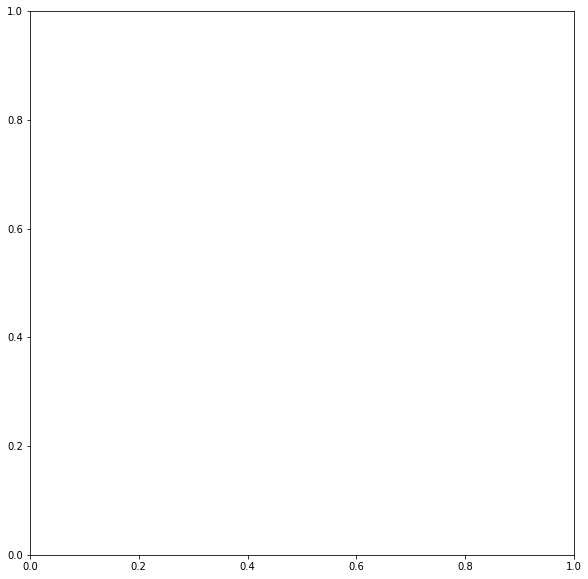

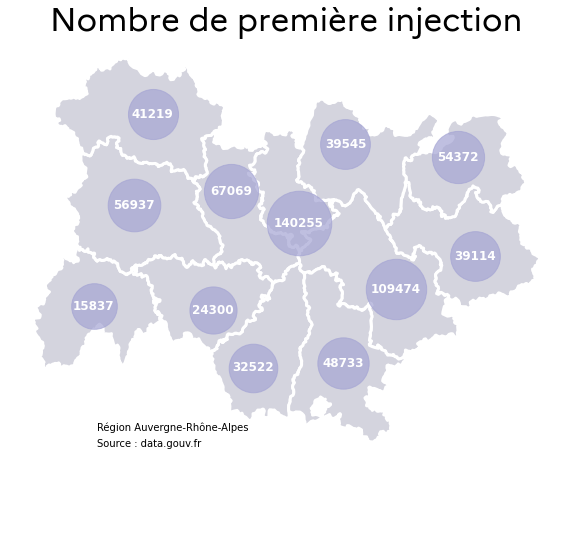

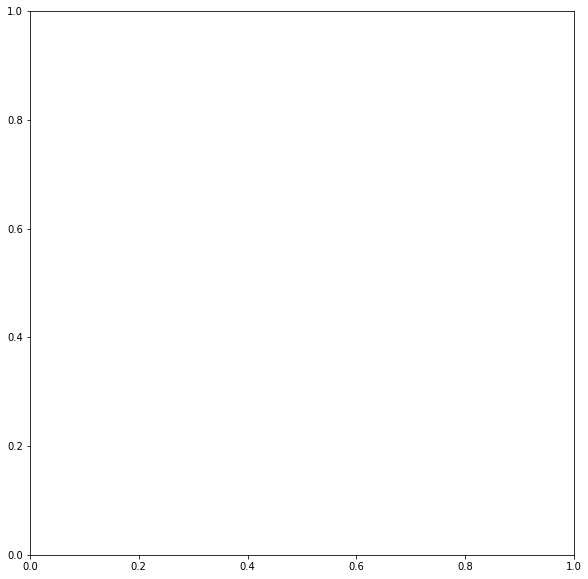

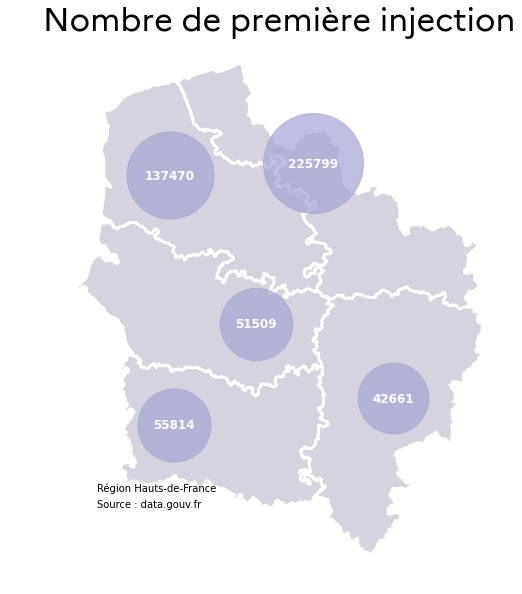

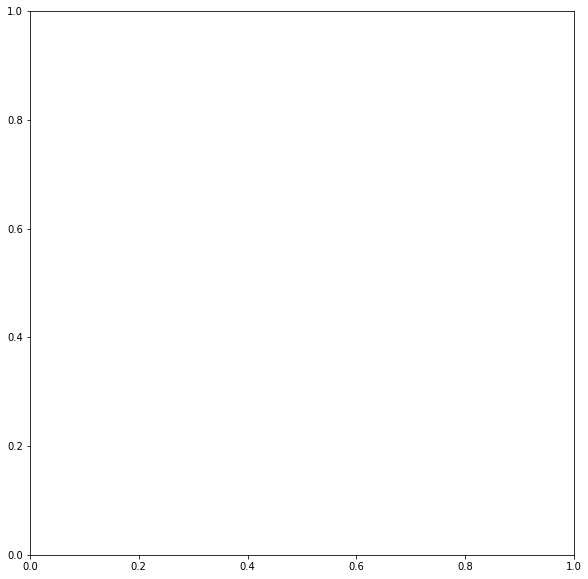

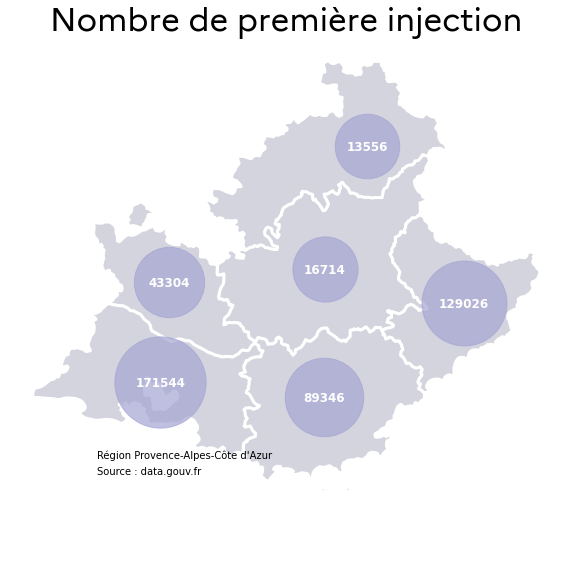

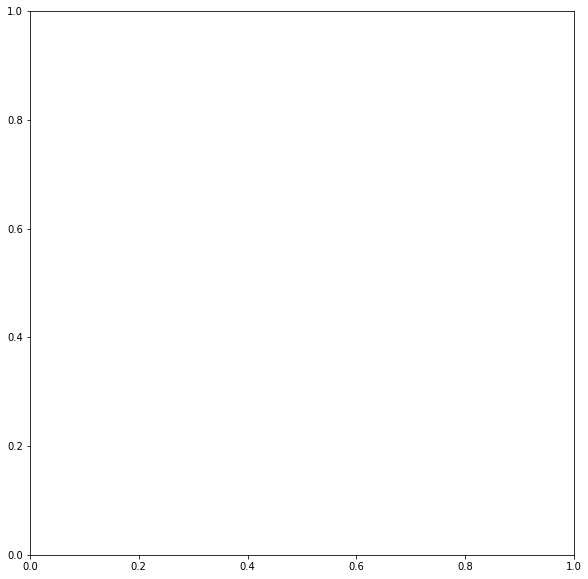

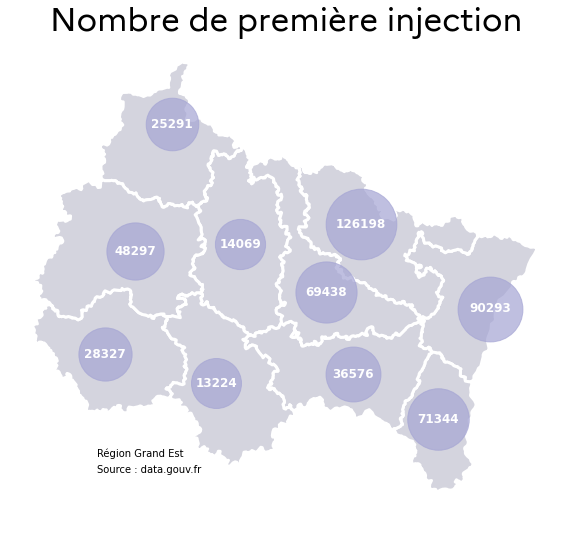

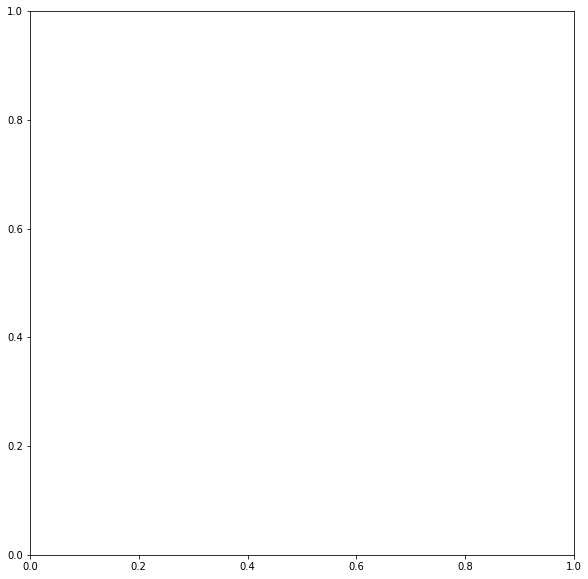

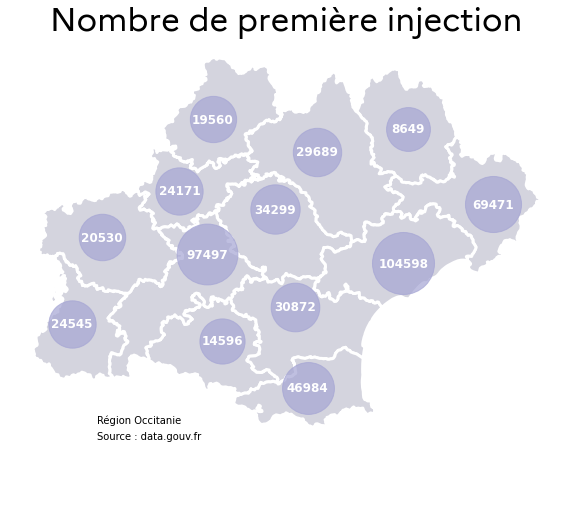

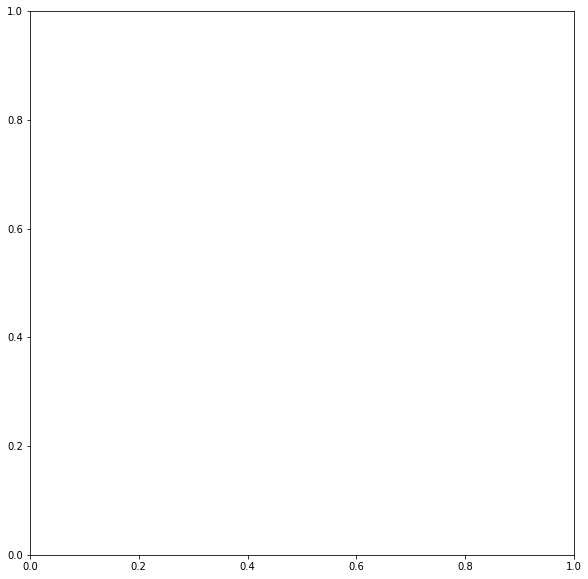

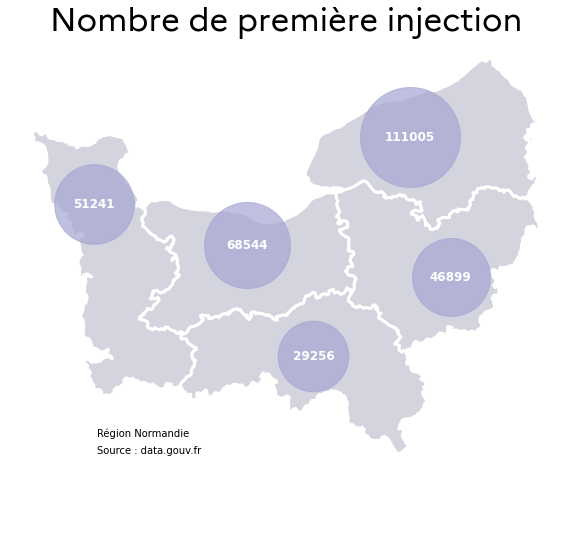

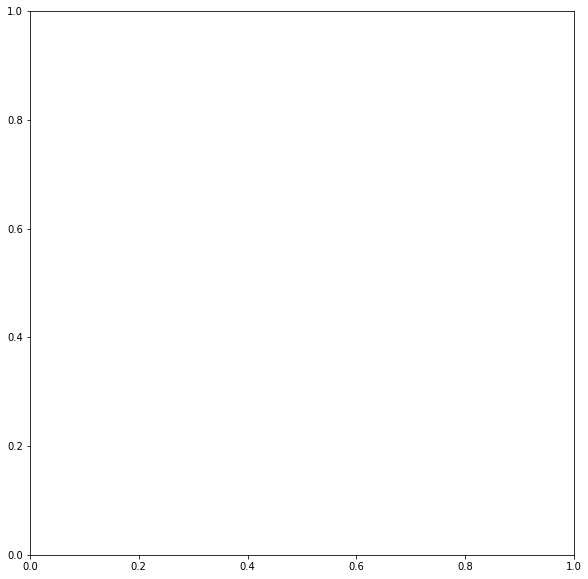

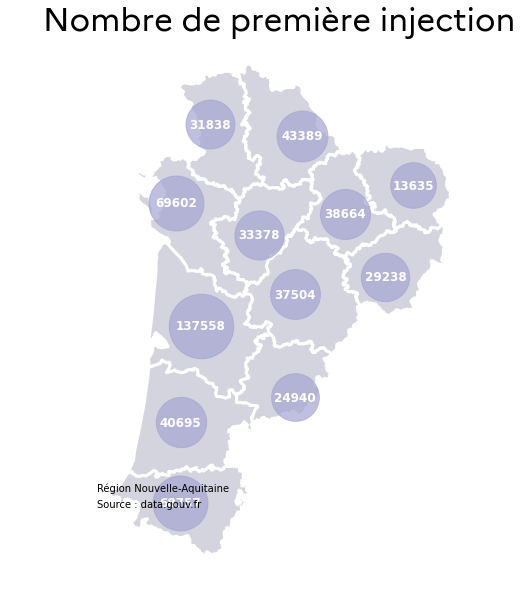

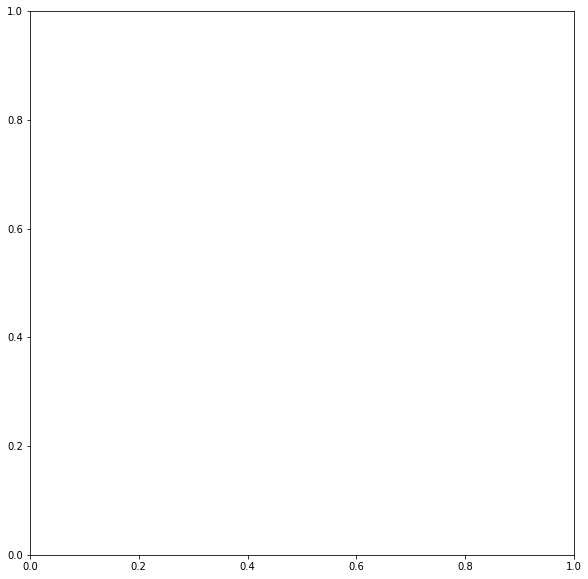

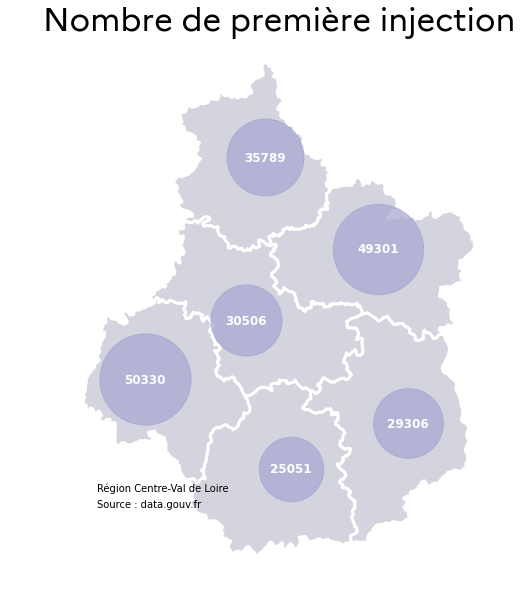

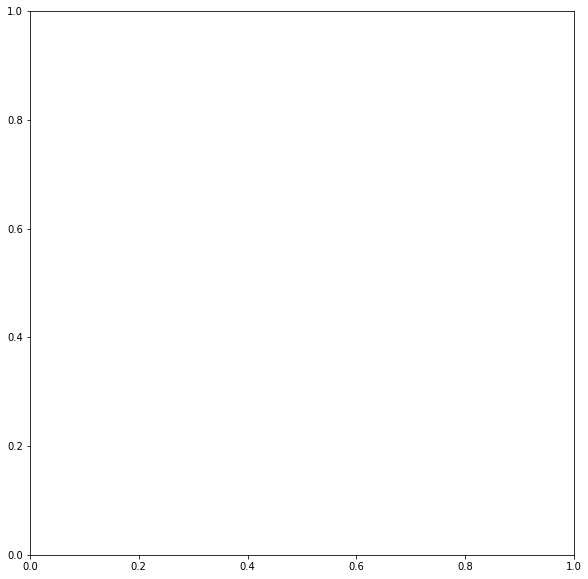

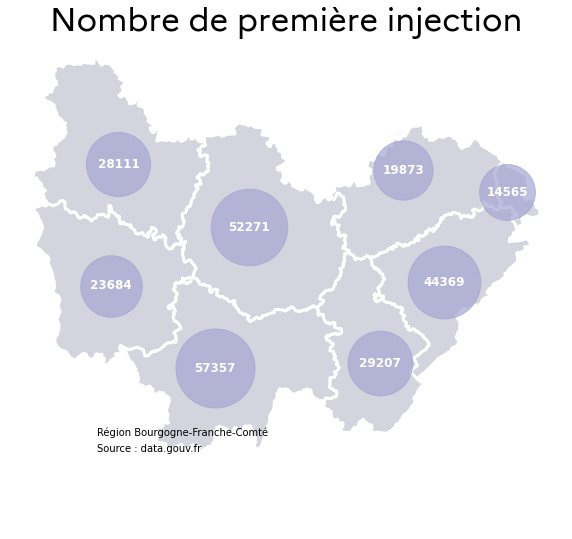

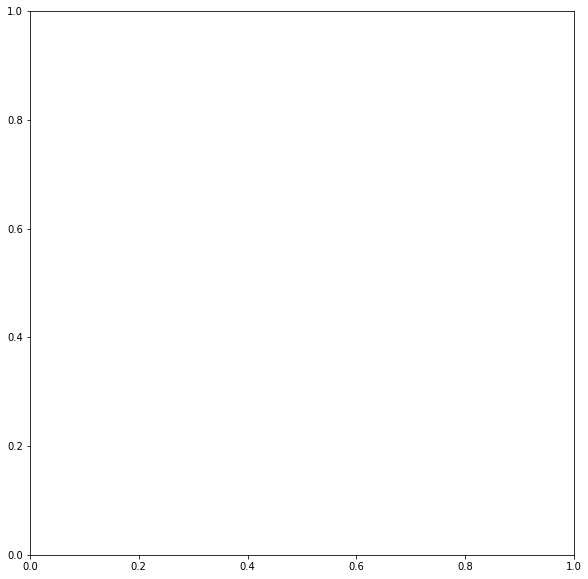

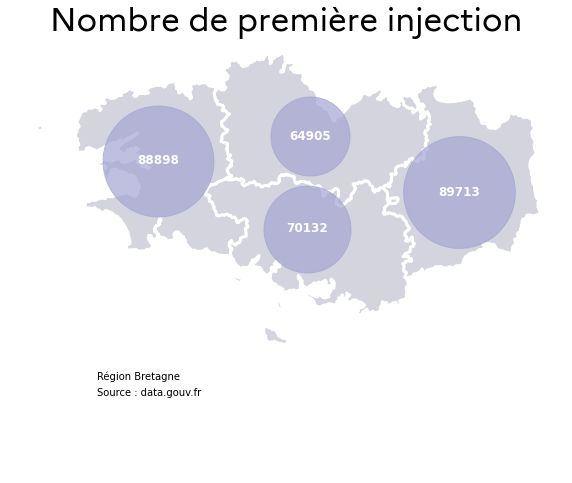

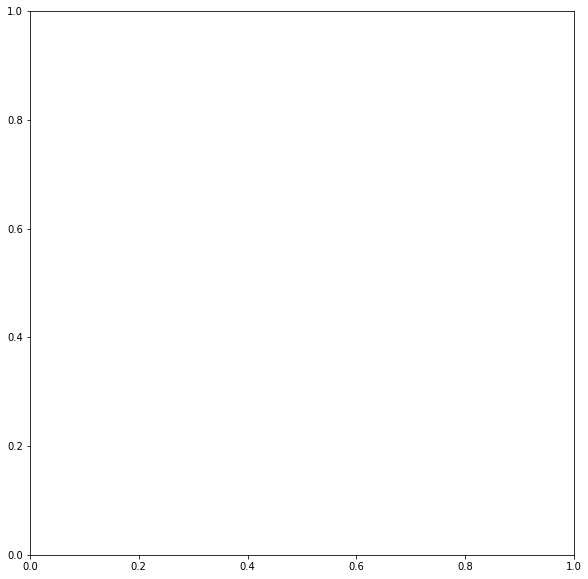

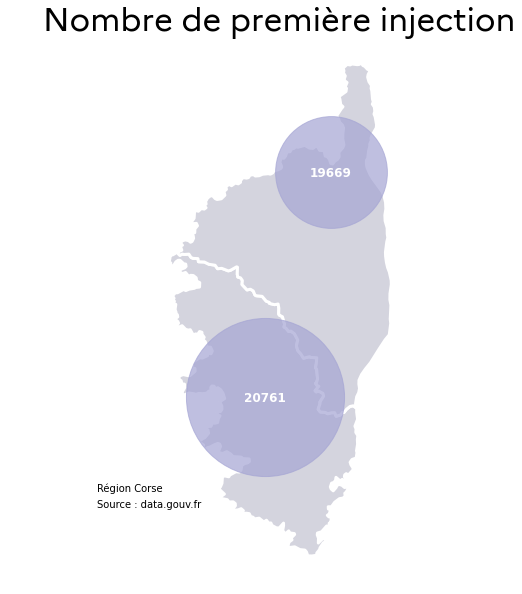

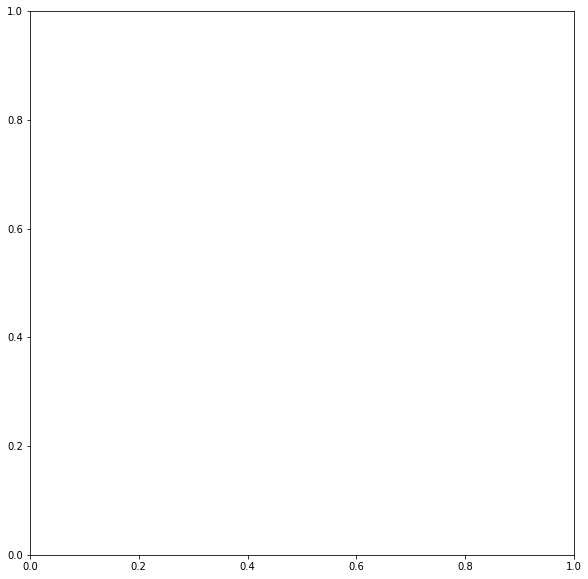

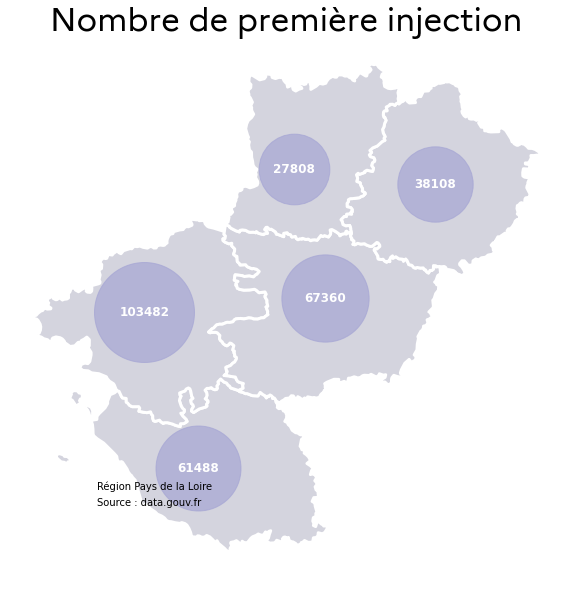

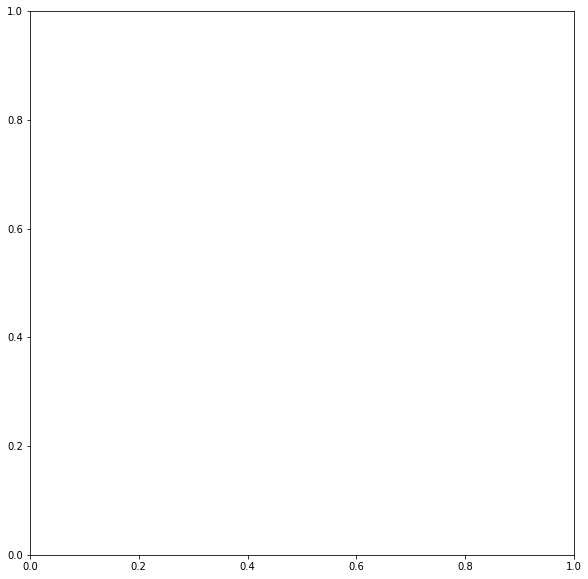

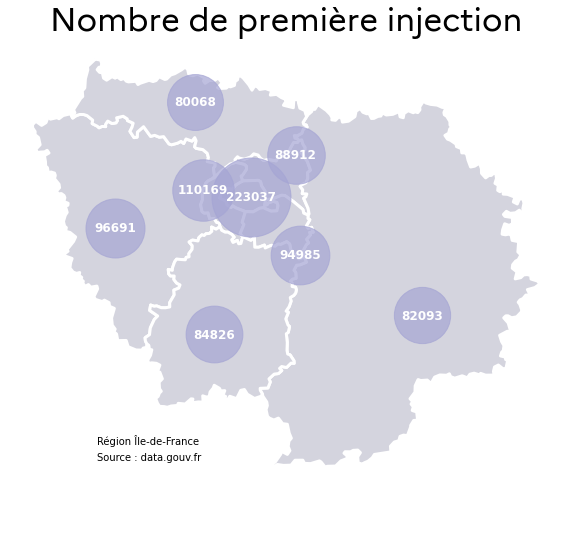

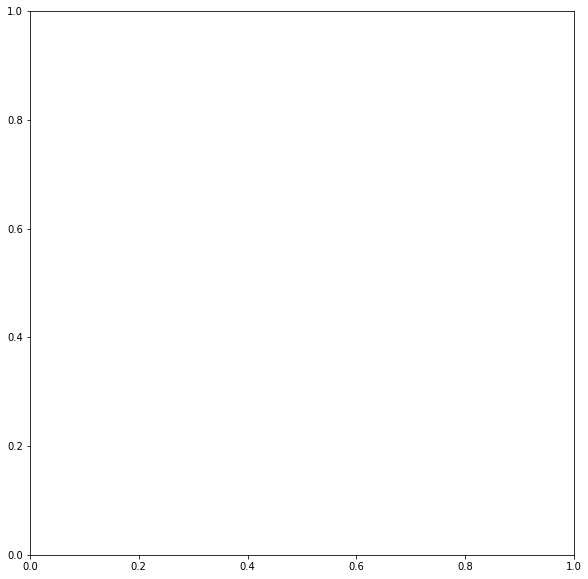

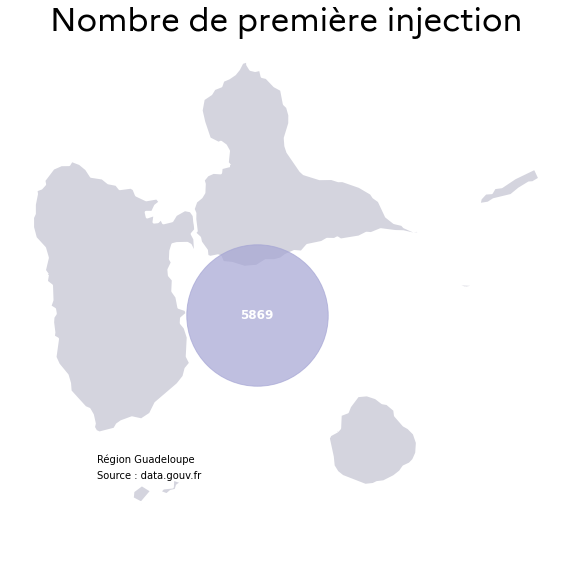

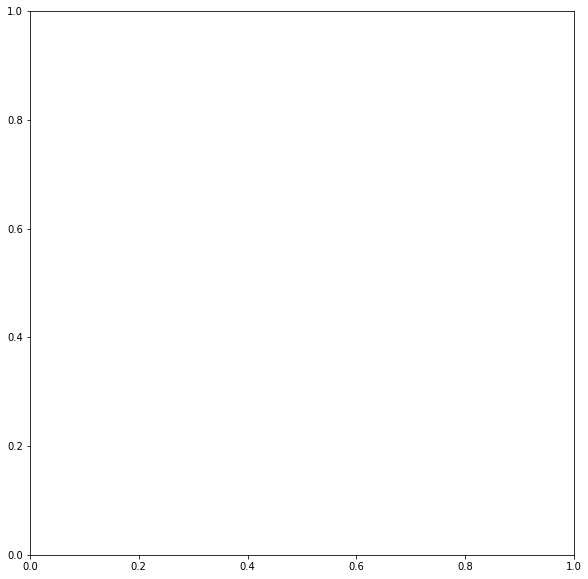

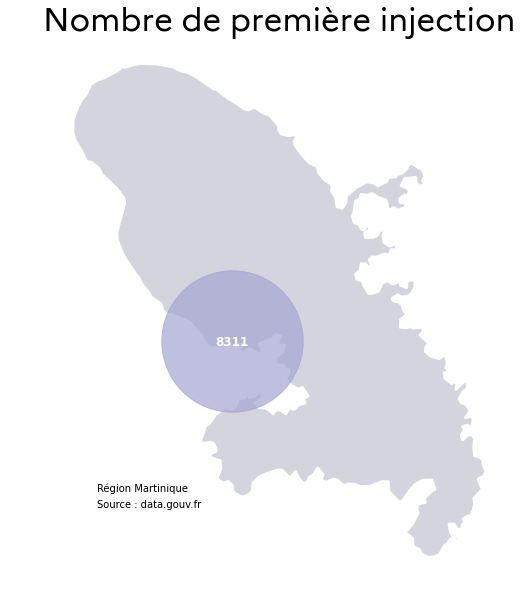

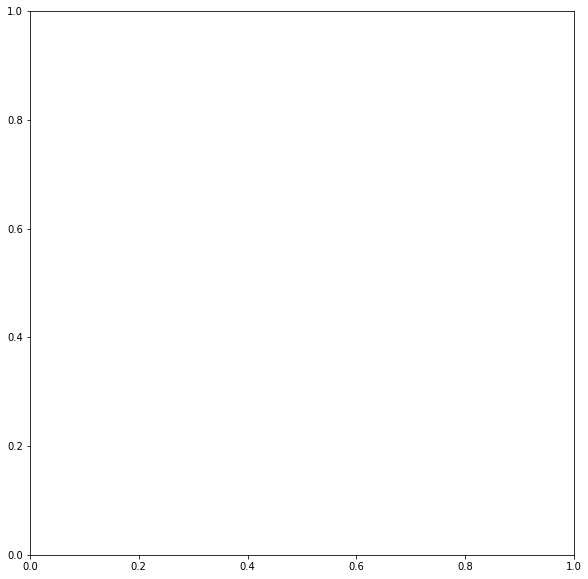

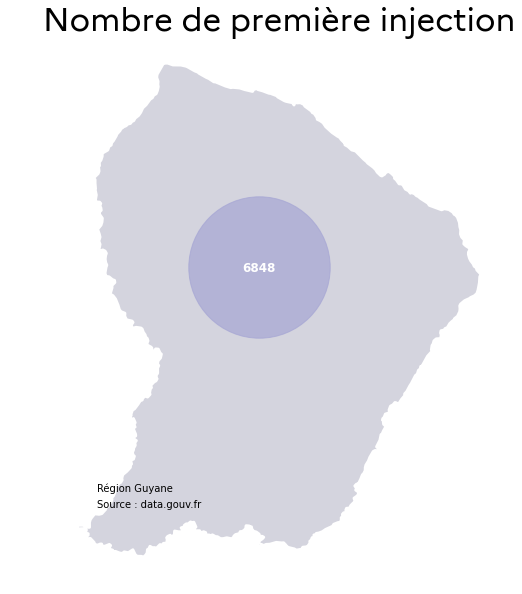

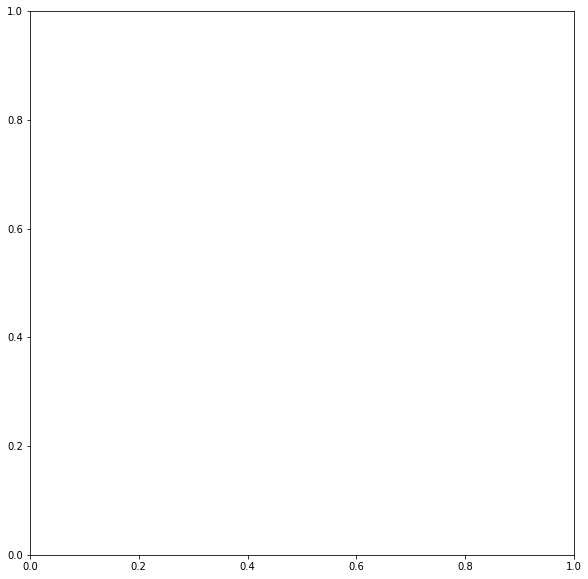

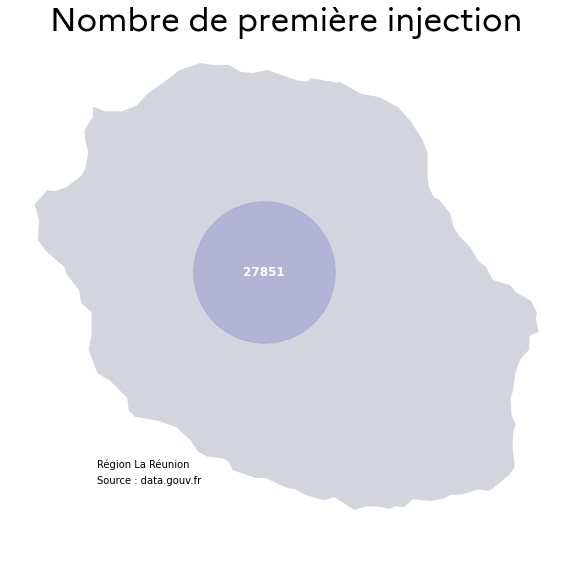

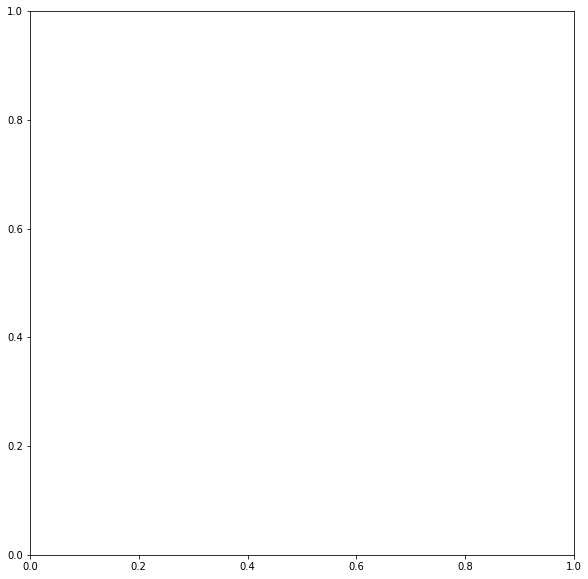

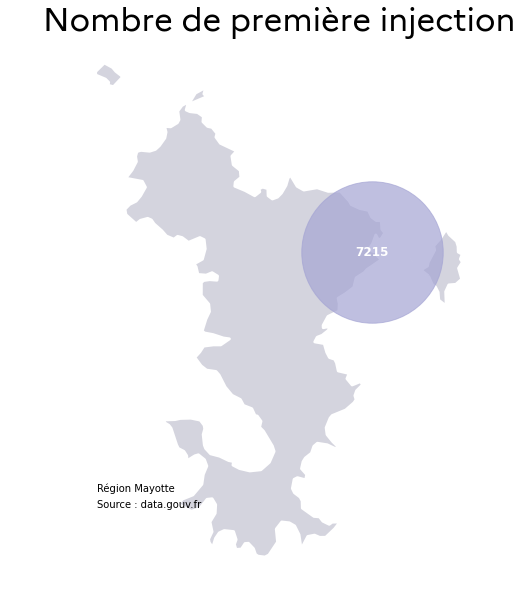

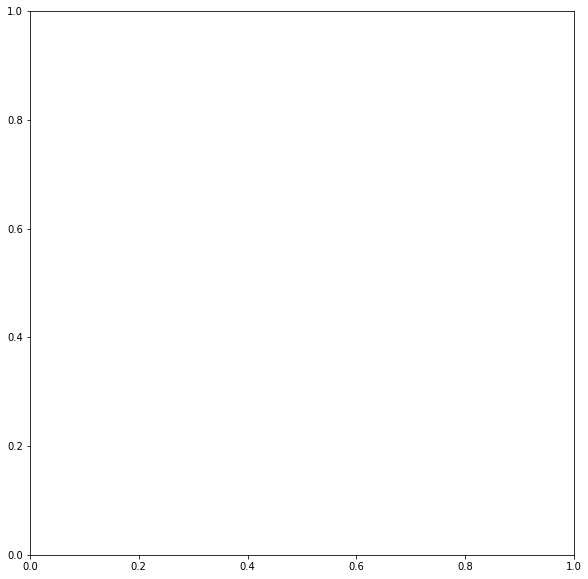

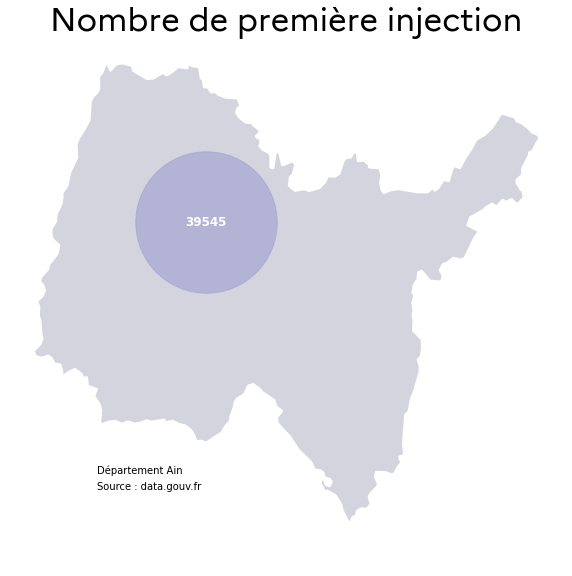

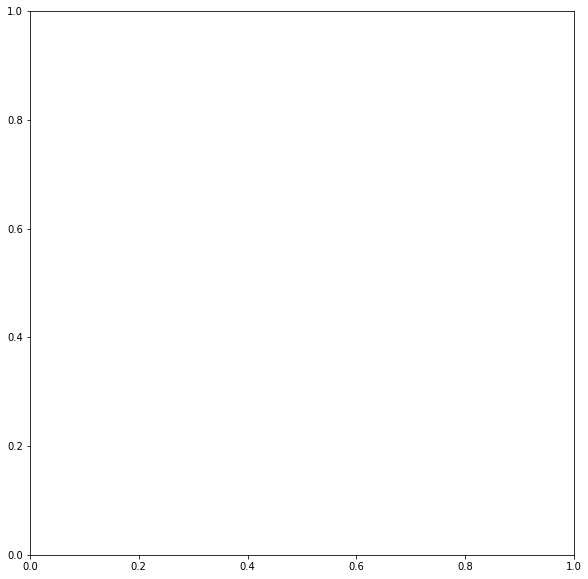

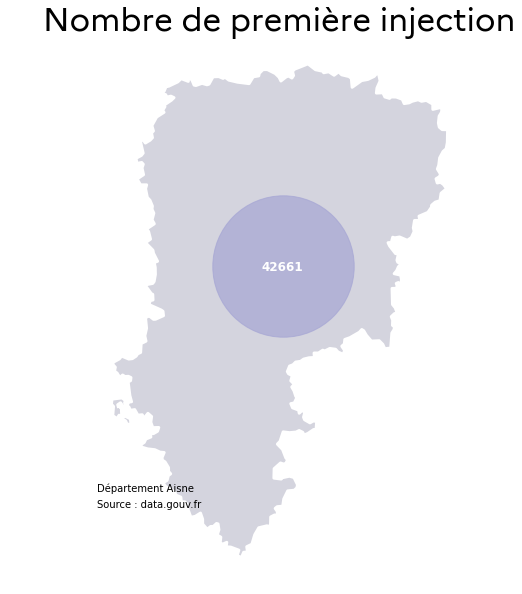

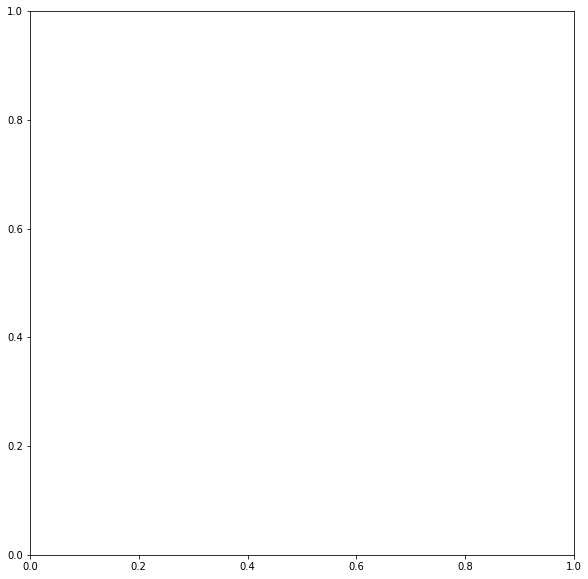

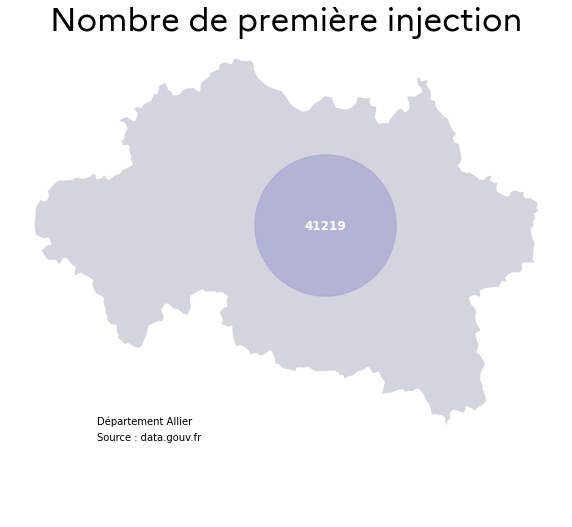

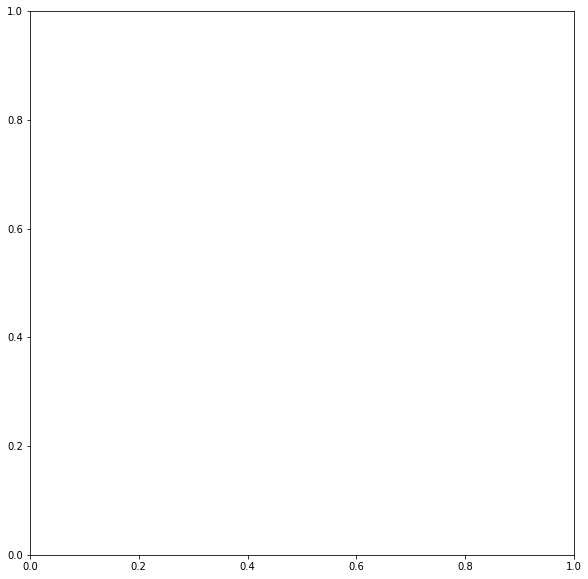

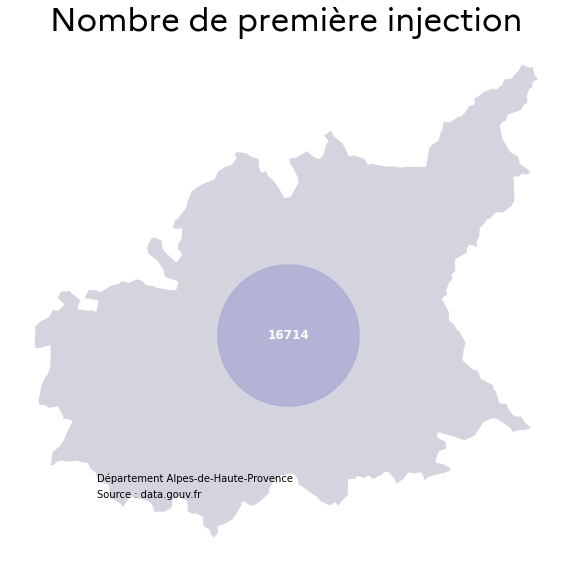

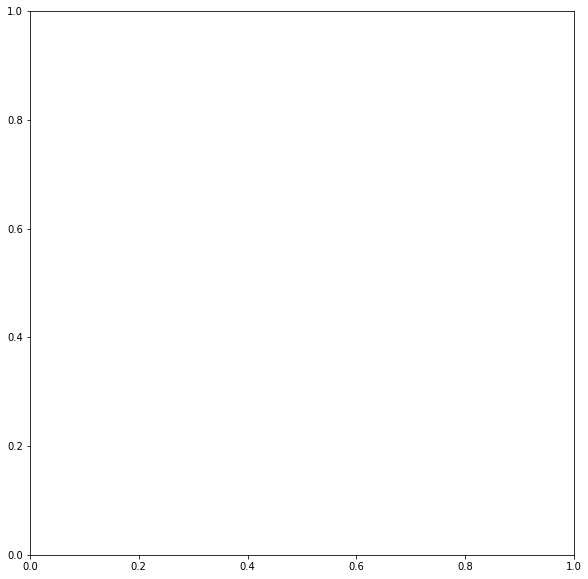

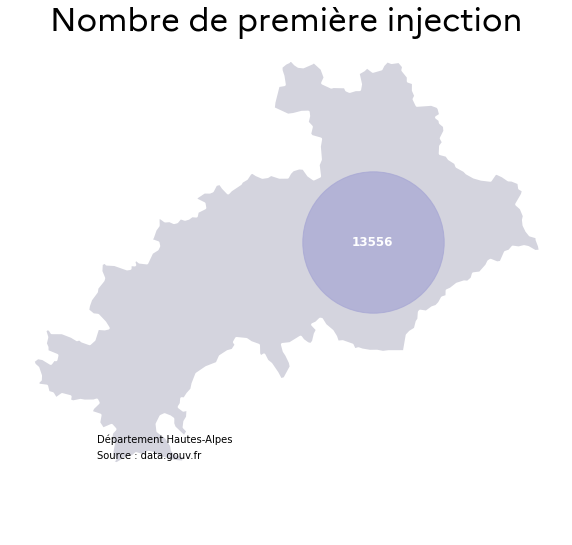

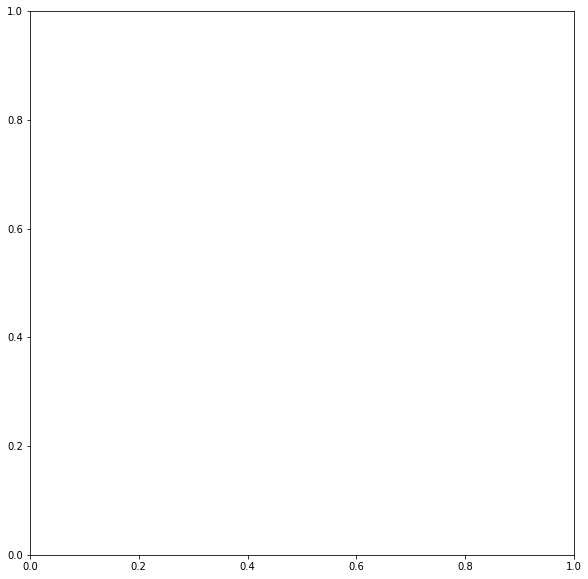

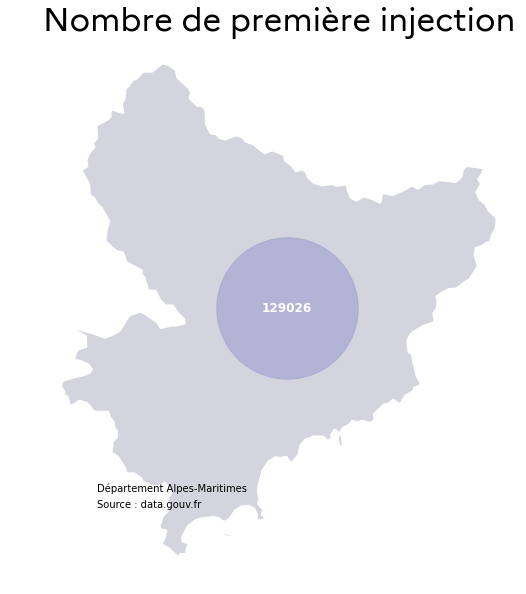

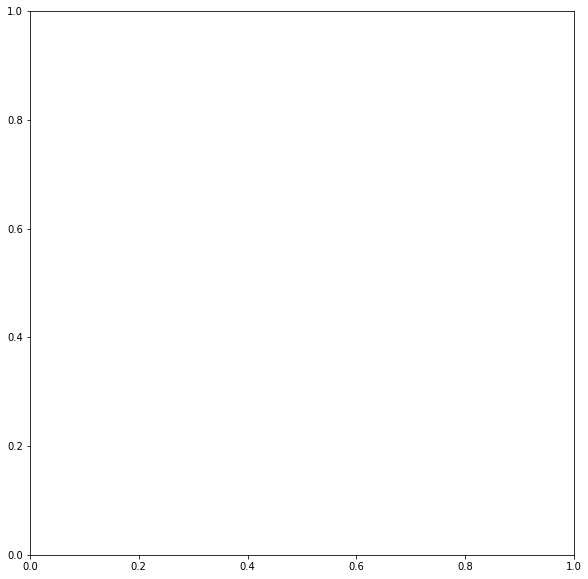

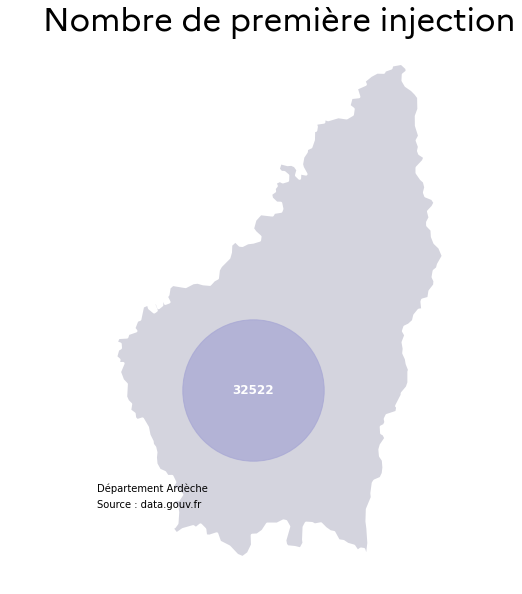

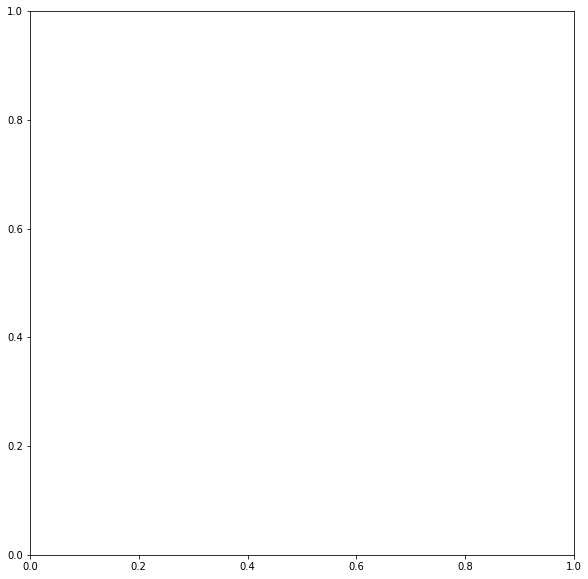

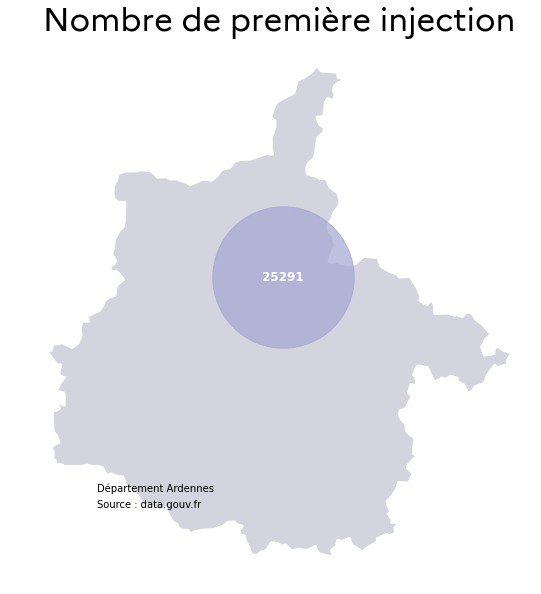

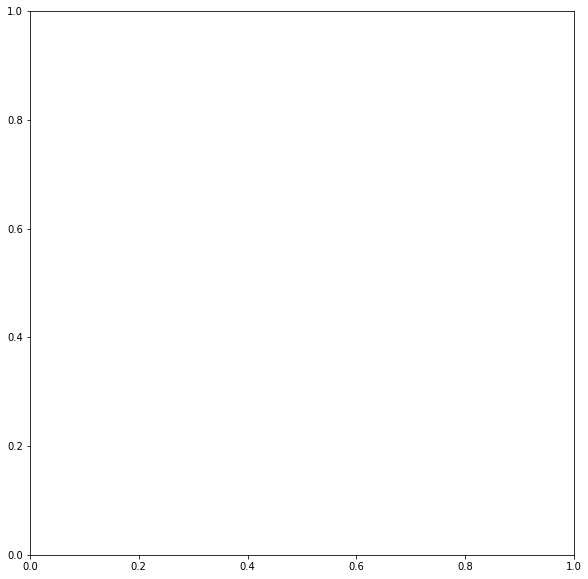

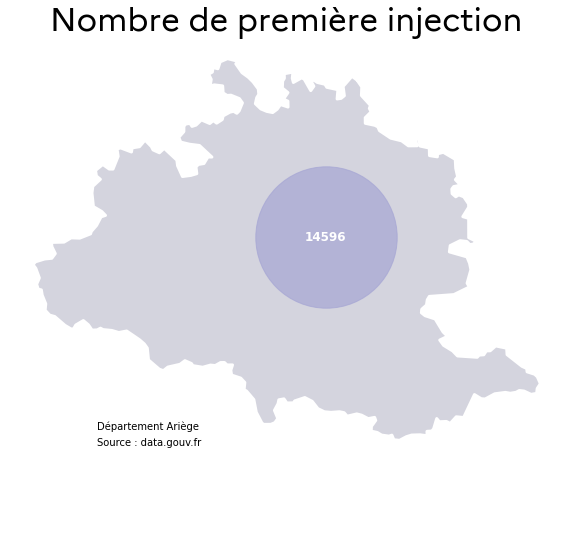

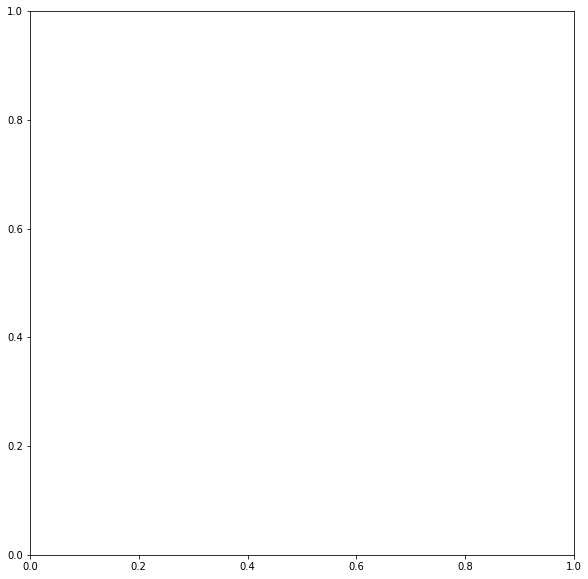

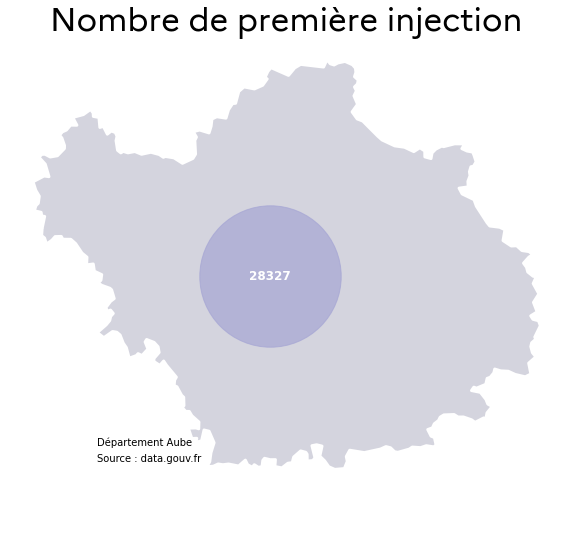

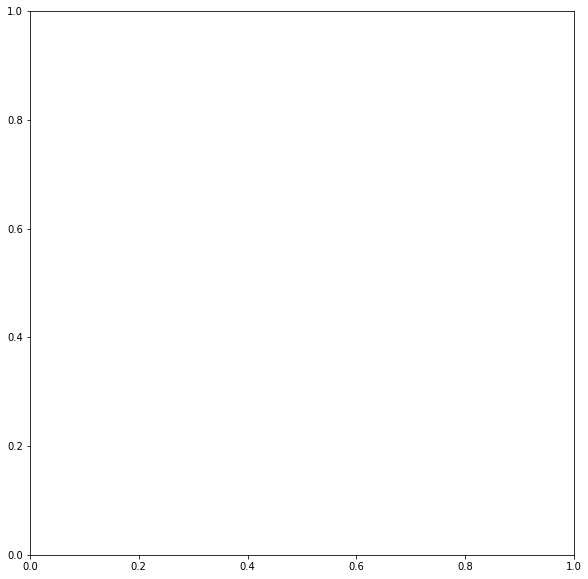

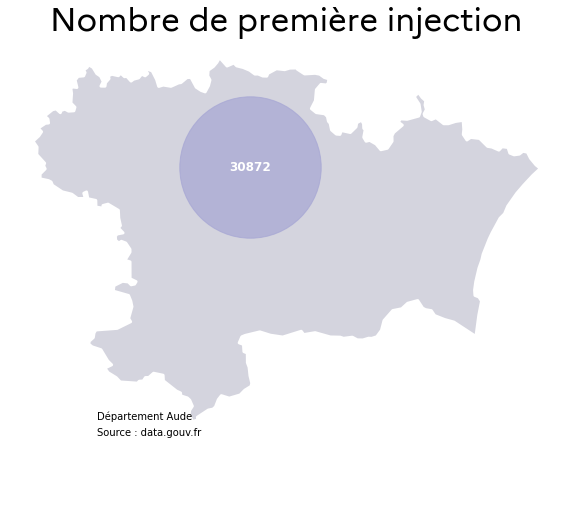

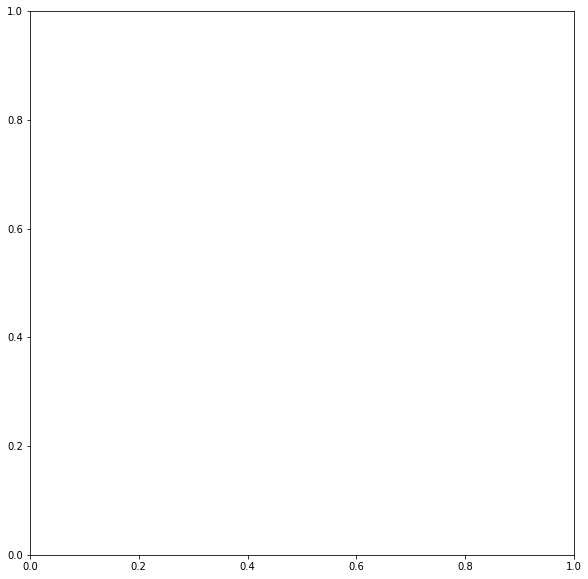

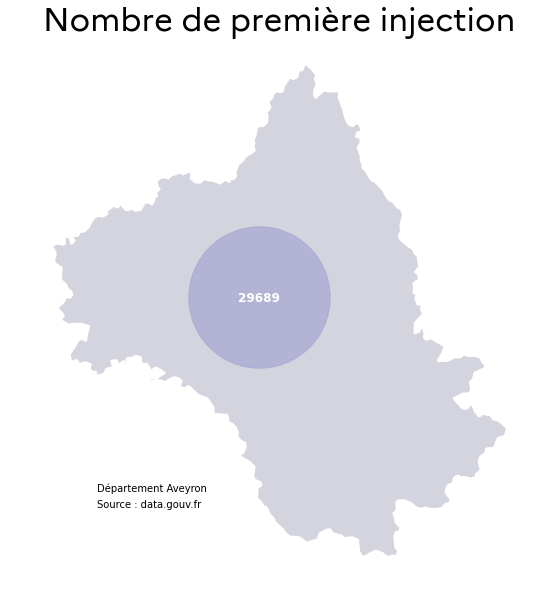

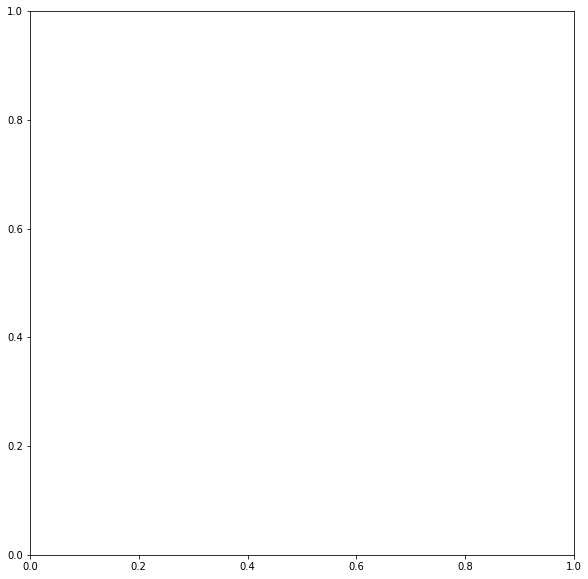

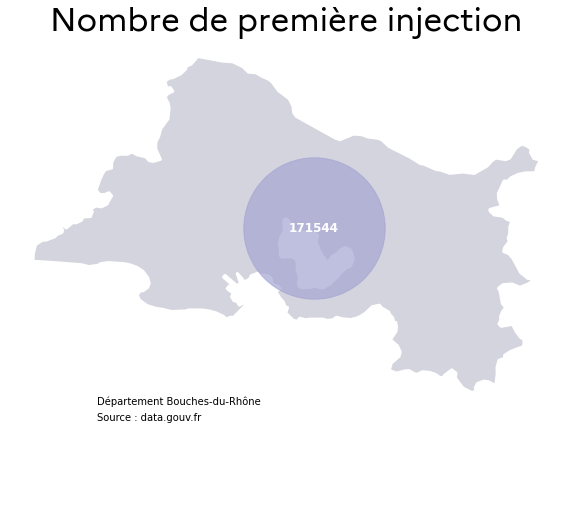

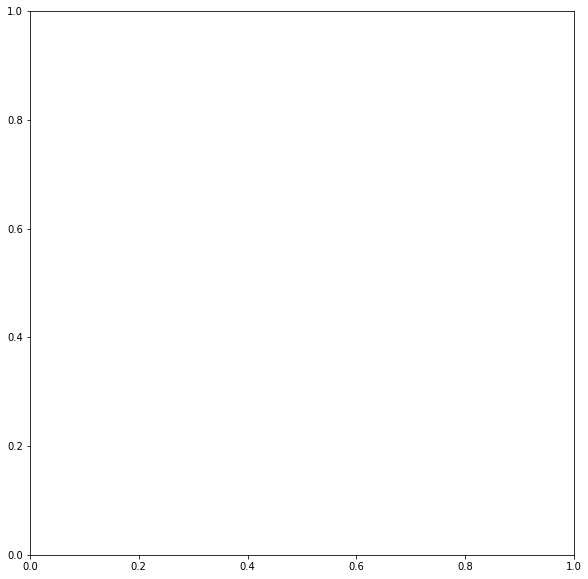

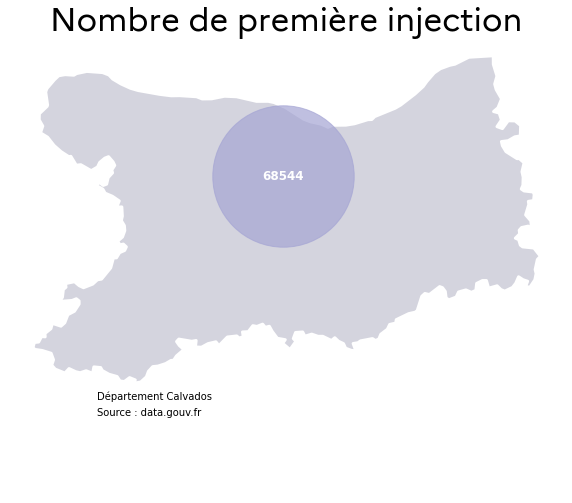

In [ ]:
generateImg('Nombre de première injection', '','vaccins-dose1','int')

In [17]:
dd = databrut[databrut['dep'] == '01']

In [19]:
dd = dd[dd['cl_age90'] == '0']

In [20]:
dd

,dep,semaine,cl_age90,Nb_tests_PCR_TA_crible,Prc_tests_PCR_TA_crible,Nb_susp_501Y_V1,Prc_susp_501Y_V1,Nb_susp_501Y_V2_3,Prc_susp_501Y_V2_3,Nb_susp_IND,Prc_susp_IND,Nb_susp_ABS,Prc_susp_ABS
27040,01,2021-02-12-2021-02-18,0,865,63.2,343,39.7,21,2.4,23,2.7,478,55.3
27041,01,2021-02-13-2021-02-19,0,933,67.7,353,37.8,23,2.5,36,3.9,521,55.8
27042,01,2021-02-14-2021-02-20,0,950,68.7,365,38.4,23,2.4,43,4.5,519,54.6
27043,01,2021-02-15-2021-02-21,0,960,68.8,374,39,24,2.5,44,4.6,518,54
27044,01,2021-02-16-2021-02-22,0,994,68.8,426,42.9,26,2.6,58,5.8,484,48.7
27045,01,2021-02-17-2021-02-23,0,1006,69.4,442,43.9,35,3.5,55,5.5,474,47.1
27046,01,2021-02-18-2021-02-24,0,1051,69.8,461,43.9,38,3.6,57,5.4,495,47.1
27047,01,2021-02-19-2021-02-25,0,1022,68.8,458,44.8,37,3.6,64,6.3,463,45.3
27048,01,2021-02-20-2021-02-26,0,1040,69,486,46.7,40,3.8,57,5.5,457,43.9
27049,01,2021-02-21-2021-02-27,0,1031,68.5,491,47.6,41,4,57,5.5,442,42.9
